1. Splitting Data
2. Modelling
3. Hyper-parameter tuning
4. Voting classifier
5. Prediction

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [41]:
# ML
from sklearn import model_selection
from sklearn import feature_selection

from sklearn.model_selection import cross_validate
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier

# 1. Splitting data

In [6]:
df = pd.read_csv('data_df.csv', sep = '\t', index_col = 0)
columns = ['Embarked','Parch','Pclass','Sex','SibSp','Survived','Title','AgeGroups','FareCategory','DeckCode','RoomCategory','FamilySize','Alone']
columns_no_survived = ['Embarked','Parch','Pclass','Sex','SibSp','Title','AgeGroups','FareCategory','DeckCode','RoomCategory','FamilySize','Alone']
target = ['Survived']

data = df[columns]
train_shape = pd.read_csv('train.csv').shape[0]
train = data[:train_shape]
test = data[train_shape:]

# 2. Modelling

In [20]:
MLA = [ensemble.AdaBoostClassifier,
       ensemble.BaggingClassifier,
       ensemble.ExtraTreesClassifier,
       ensemble.GradientBoostingClassifier,
       ensemble.RandomForestClassifier,
       
       linear_model.LogisticRegressionCV(),
       linear_model.RidgeClassifierCV(),
       
       naive_bayes.GaussianNB(),
       
       svm.SVC(probability=True),
       svm.NuSVC(probability=True),
       svm.LinearSVC(),
       
       tree.DecisionTreeClassifier(),
       tree.DecisionTreeClassifier(),
       
       neighbors.KNeighborsClassifier()
       
       XGBClassifier()
]

In [21]:
# train_test_split alternative
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size=0.3, train_size = 0.6, random_state=0)

In [13]:
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Time']

MLA_df = pd.DataFrame(columns = MLA_columns)

MLA_predict = train[target] # df for prediction

row_index = 0
for algorithm in MLA:
    MLA_name = algorithm.__class__.__name__
    MLA_df.loc[row_index, 'MLA Name'] = MLA_name
    MLA_df.loc[row_index, 'MLA Parameters'] = str(algorithm.get_params())
    
    cv_result = cross_validate(algorithm, train[columns_no_survived], train[target], cv = cv_split)
    
    MLA_df.loc[row_index, 'MLA Train Accuracy Mean'] = cv_result['train_score'].mean()
    MLA_df.loc[row_index, 'MLA Test Accuracy Mean'] = cv_result['test_score'].mean()
    MLA_df.loc[row_index, 'MLA Time'] = cv_result['fit_time'].mean()
    
    # make prediction
    algorithm.fit(train[columns_no_survived], train[target])
    MLA_predict[MLA_name] = algorithm.predict(train[columns_no_survived])
    
    row_index += 1

In [20]:
MLA_df.sort_values(by = 'MLA Test Accuracy Mean', ascending = False, inplace = True)
MLA_df

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
3,GradientBoostingClassifier,"{'min_impurity_split': None, 'warm_start': Fal...",0.893446,0.828358,0.232213
1,BaggingClassifier,"{'warm_start': False, 'n_jobs': 1, 'max_featur...",0.921536,0.823507,0.0611035
4,RandomForestClassifier,"{'min_impurity_split': None, 'class_weight': N...",0.92191,0.820149,0.0616036
13,SVC,"{'tol': 0.001, 'class_weight': None, 'shrinkin...",0.851498,0.819776,0.112306
14,NuSVC,"{'tol': 0.001, 'class_weight': None, 'shrinkin...",0.844195,0.81791,0.124207
2,ExtraTreesClassifier,"{'min_impurity_split': None, 'class_weight': N...",0.927715,0.817537,0.0587034
0,AdaBoostClassifier,"{'learning_rate': 1.0, 'random_state': None, '...",0.83633,0.815299,0.293417
16,DecisionTreeClassifier,"{'min_impurity_split': None, 'class_weight': N...",0.927715,0.815299,0.0114007
12,KNeighborsClassifier,"{'n_jobs': 1, 'n_neighbors': 5, 'weights': 'un...",0.853371,0.810821,0.00820043
17,ExtraTreeClassifier,"{'min_impurity_split': None, 'class_weight': N...",0.927715,0.809328,0.0103006


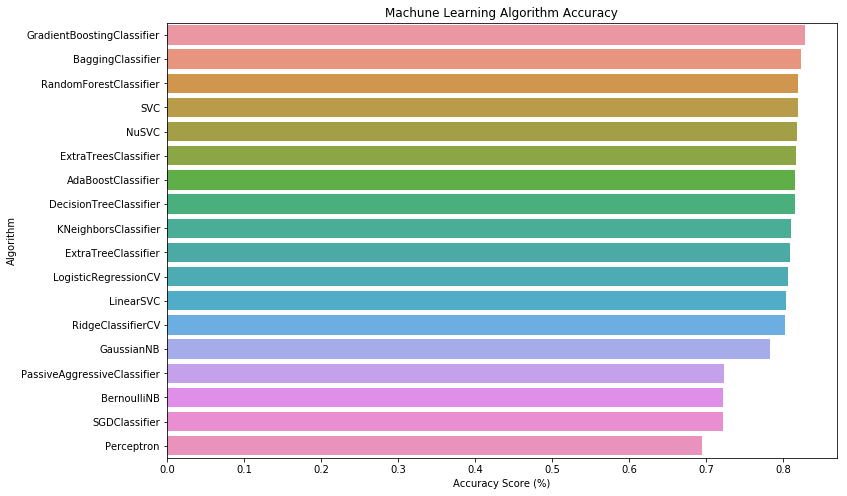

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x= 'MLA Test Accuracy Mean', y= 'MLA Name', data = MLA_df)
ax.set (title = 'Machune Learning Algorithm Accuracy', ylabel = 'Algorithm', xlabel = 'Accuracy Score (%)')

# 3. Hyper-parameter tunning

### Decision Tree

In [40]:
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[2,4,6,8,10,None],
             'random_state':[0]}

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(train[columns_no_survived], train[target])
print('Best parameters: ', tune_model.best_params_)
print('Trainig mean score is ', tune_model.cv_results_['mean_train_score'].mean())
print('Test mean score is ', tune_model.cv_results_['mean_test_score'].mean())

Best parameters:  {'random_state': 0, 'criterion': 'entropy', 'max_depth': 4}
Trainig mean score is  0.927534940407
Test mean score is  0.827855880675


### Recursive feature elimination (RFE) with cross validation

In [57]:
# base model 
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_result = cross_validate(dtree, train[columns_no_survived], train[target], cv = cv_split)
dtree.fit(train[columns_no_survived], train[target])
print('--------Base model Decision Tree--------')
print('Columns: ', train[columns_no_survived].columns.values)
print('Training mean score is ', base_result['train_score'].mean())
print('Test score mean is ', base_result['test_score'].mean(), '\n\n')


# RFE model
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(train[columns_no_survived], train[target])
X_rfe = train[columns_no_survived].columns.values[dtree_rfe.get_support()]
rfe_results = cross_validate(dtree, train[X_rfe], train[target], cv = cv_split)
print('--------Model: Decision Tree RFE--------')
print('Columns: ', X_rfe)
print('Training mean score is ', rfe_results['train_score'].mean())
print('Test score mean is ', rfe_results['test_score'].mean(), '\n\n')


# tune RFE model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid = param_grid, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(train[X_rfe], train[target])
print('--------Model: Decision Tree RFE Tuned Parameters--------')
print('Best parameters: ', rfe_tune_model.best_params_)
print('Training mean score is ', rfe_tune_model.cv_results_['mean_train_score'].mean())
print('Test score mean is ', rfe_tune_model.cv_results_['mean_test_score'].mean())

--------Base model Decision Tree--------
Columns:  ['Embarked' 'Parch' 'Pclass' 'Sex' 'SibSp' 'Title' 'AgeGroups'
 'FareCategory' 'DeckCode' 'RoomCategory' 'FamilySize' 'Alone']
Training mean score is  0.927715355805
Test score mean is  0.817537313433 


--------Model: Decision Tree RFE--------
Columns:  ['Pclass' 'Title' 'AgeGroups' 'FareCategory' 'DeckCode' 'RoomCategory'
 'FamilySize']
Training mean score is  0.916104868914
Test score mean is  0.821268656716 


--------Model: Decision Tree RFE Tuned Parameters--------
Best parameters:  {'random_state': 0, 'criterion': 'entropy', 'max_depth': 4}
Training mean score is  0.924767034823
Test score mean is  0.835227333557


# 4. Voting Classifier

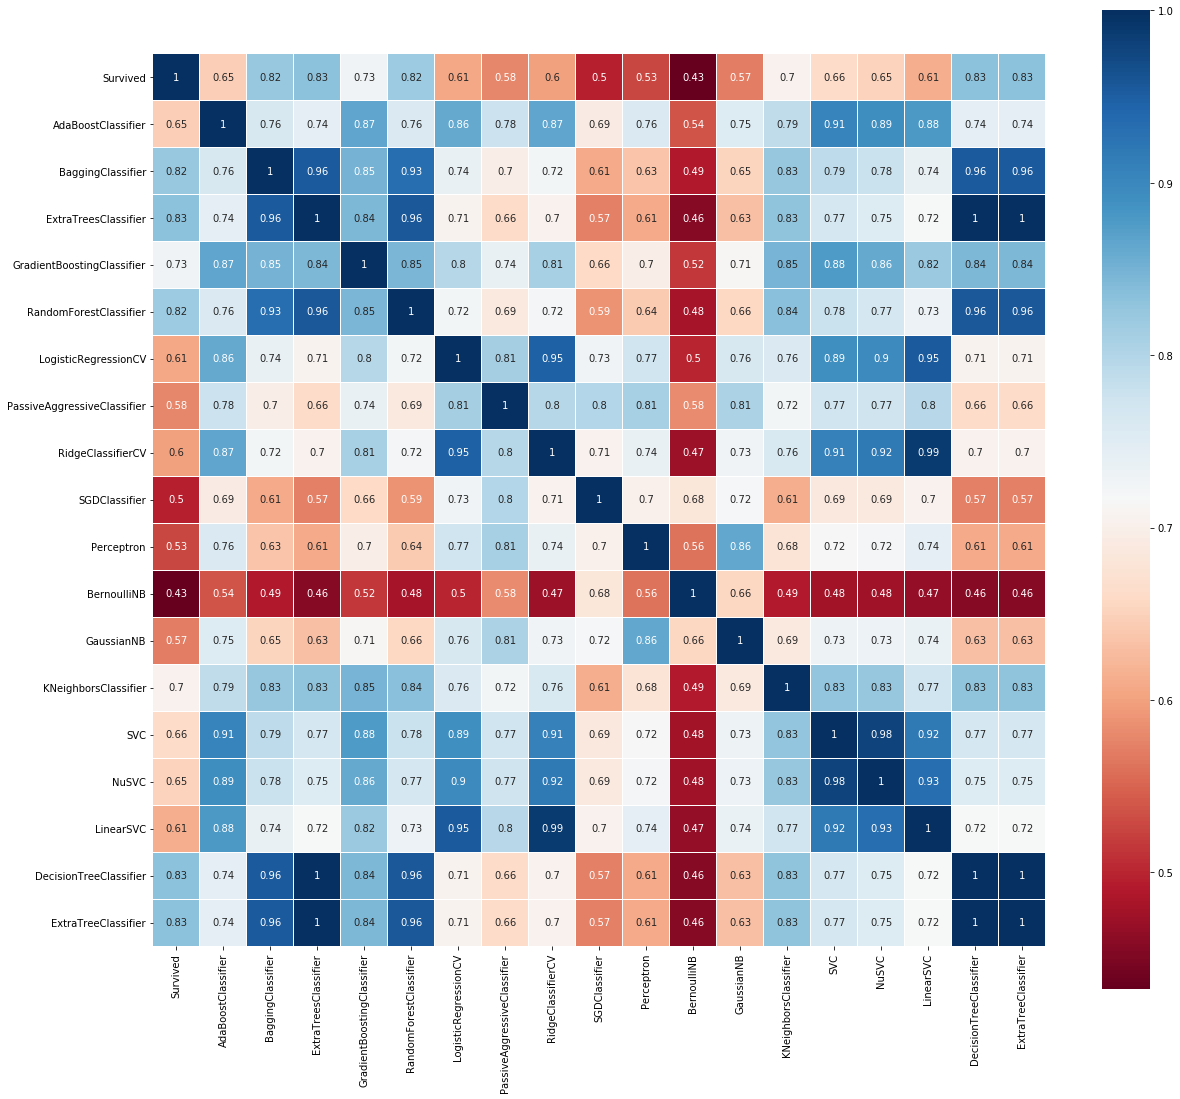

In [60]:
plt.figure(figsize = (20,18))
sns.heatmap(MLA_predict.corr(), linewidths = 0.1, vmax = 1.0, square = True, annot = True, cmap = plt.cm.RdBu)

In [61]:
vot_class = [('Ada', ensemble.AdaBoostClassifier()),
            ('Bagg', ensemble.BaggingClassifier()),
            ('Ext_Tree', ensemble.ExtraTreesClassifier()),
            ('Grad_Boost', ensemble.GradientBoostingClassifier()),
            ('Forest', ensemble.RandomForestClassifier()),
            ('Log_Reg', linear_model.LogisticRegressionCV()),
            ('Bayes', naive_bayes.GaussianNB()),
            ('KNN', neighbors.KNeighborsClassifier()),
            ('SVC', svm.SVC(probability=True))]
            #('XGB',XGBClassifier())]

In [65]:
# Hard Vote
vote_hard = ensemble.VotingClassifier(estimators = vot_class, voting = 'hard')
vote_hard_cv = cross_validate(vote_hard, train[columns_no_survived], train[target], cv = cv_split)
vote_hard.fit(train[columns_no_survived], train[target])
print('Hard Voting Training Mean Score is ', vote_hard_cv['train_score'].mean())
print('Hard Voting Test Mean Score is ', vote_hard_cv['test_score'].mean())

Hard Voting Training Mean Score is  0.891198501873
Hard Voting Test Mean Score is  0.836567164179


In [68]:
# Soft Vote
vote_soft = ensemble.VotingClassifier(estimators = vot_class, voting = 'soft')
vote_soft_cv = cross_validate(vote_soft, train[columns_no_survived], train[target], cv = cv_split)
vote_soft.fit(train[columns_no_survived], train[target])
print('Soft Voting Training Mean Score is ', vote_soft_cv['train_score'].mean())
print('Soft Voting Test Mean Score is ', vote_soft_cv['test_score'].mean())

Soft Voting Training Mean Score is  0.908239700375
Soft Voting Test Mean Score is  0.827985074627


# 5. Prediction

In [ ]:
test['Survived'] = grid_hard.predict(test[columns_no_survived])